In [36]:
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
import numpy as np

In [6]:
names = ['BMO', 'Year', 'month', 'day','MeanT',]

In [7]:
got = pd.read_csv(r"C:\Users\66910\Downloads\BelgorodWeather\bel_till_2023.txt",delim_whitespace=True, names = names )

In [8]:
got

,BMO,Year,month,day,MeanT
0,34202,1936,1,1,0.0
1,34202,1936,1,2,-2.3
2,34202,1936,1,3,-4.6
3,34202,1936,1,4,-2.5
4,34202,1936,1,5,-1.4
...,...,...,...,...,...
32137,34202,2023,12,27,NaN
32138,34202,2023,12,28,NaN
32139,34202,2023,12,29,NaN
32140,34202,2023,12,30,NaN


In [9]:
# слепили дату
got["data"] = got["Year"].astype(str) + "-" \
+ got["month"].astype(str) + "-" + got["day"].astype(str)

In [10]:
got["data"] = pd.to_datetime(got["data"])

In [11]:
got

,BMO,Year,month,day,MeanT,data
0,34202,1936,1,1,0.0,1936-01-01
1,34202,1936,1,2,-2.3,1936-01-02
2,34202,1936,1,3,-4.6,1936-01-03
3,34202,1936,1,4,-2.5,1936-01-04
4,34202,1936,1,5,-1.4,1936-01-05
...,...,...,...,...,...,...
32137,34202,2023,12,27,NaN,2023-12-27
32138,34202,2023,12,28,NaN,2023-12-28
32139,34202,2023,12,29,NaN,2023-12-29
32140,34202,2023,12,30,NaN,2023-12-30


In [12]:
got = got[["data","MeanT"]]
got.columns = ["data","T"]

In [13]:
got.set_index('data', inplace=True)

In [14]:
got = got.dropna()
got

,T
data,
1936-01-01,0.0
1936-01-02,-2.3
1936-01-03,-4.6
1936-01-04,-2.5
1936-01-05,-1.4
...,...
2023-09-26,17.6
2023-09-27,15.9
2023-09-28,15.8


In [15]:
got.reset_index(inplace=True)

In [16]:
got

,data,T
0,1936-01-01,0.0
1,1936-01-02,-2.3
2,1936-01-03,-4.6
3,1936-01-04,-2.5
4,1936-01-05,-1.4
...,...,...
31098,2023-09-26,17.6
31099,2023-09-27,15.9
31100,2023-09-28,15.8
31101,2023-09-29,14.6


In [17]:
start = '2005-02-01'
end = '2023-09-30'

In [18]:
filtered_df = got[got['data'].between(start, end)]

In [19]:
filtered_df.set_index('data', inplace=True)

In [20]:
filtered_df

,T
data,
2005-02-01,-11.0
2005-02-02,-9.1
2005-02-03,-11.3
2005-02-04,-14.1
2005-02-05,-16.3
...,...
2023-09-26,17.6
2023-09-27,15.9
2023-09-28,15.8


In [21]:
rp_5 = pd.read_excel(r"C:\Users\66910\Downloads\rp\rp_5_day.xlsx")

In [22]:
rp_5.set_index('data', inplace=True)

In [23]:
rp_5

,T
data,
2005-02-01,-11.180000
2005-02-02,-8.840000
2005-02-03,-12.080000
2005-02-04,-15.260000
2005-02-05,-16.700000
...,...
2024-03-15,2.112500
2024-03-16,2.812500
2024-03-17,3.450000


In [24]:
merged_df = pd.merge(filtered_df, rp_5, left_index=True, right_index=True, how='inner')

In [25]:
final_df = merged_df.dropna()

In [26]:
final_df

,T_x,T_y
data,,
2005-02-01,-11.0,-11.180000
2005-02-02,-9.1,-8.840000
2005-02-03,-11.3,-12.080000
2005-02-04,-14.1,-15.260000
2005-02-05,-16.3,-16.700000
...,...,...
2023-09-26,17.6,19.012500
2023-09-27,15.9,17.475000
2023-09-28,15.8,16.962500


In [27]:
t_stat, p_value = stats.ttest_ind(final_df['T_x'], final_df['T_y'])

print(f"t-статистика: {t_stat:.2f}")
print(f"p-значение: {p_value:.5f}")
if p_value < 0.05:
    print("Отличия между выборками статистически значимы.")
else:
    print("Отличия между выборками не являются статистически значимыми.")

t-статистика: -1.36
p-значение: 0.17400
Отличия между выборками не являются статистически значимыми.


In [28]:
correlation_coefficient, p_value = pearsonr(final_df['T_x'], final_df['T_y'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient:.2f}")
print(f"p-значение: {p_value:.5f}")

Коэффициент корреляции Пирсона: 1.00
p-значение: 0.00000


In [29]:
final_df.corr()

,T_x,T_y
T_x,1.000000,0.997234
T_y,0.997234,1.000000


In [30]:
compare = final_df.describe()
compare

,T_x,T_y
count,6384.000000,6384.000000
mean,8.074828,8.334199
std,10.671786,10.884182
min,-26.400000,-27.240000
25%,-0.100000,-0.112500
50%,8.600000,8.855000
75%,17.300000,17.790625
max,30.000000,31.162500


In [31]:
final_df.tail(10)

,T_x,T_y
data,,
2023-09-21,18.8,19.585714
2023-09-22,16.8,17.057143
2023-09-23,19.1,18.500000
2023-09-24,18.6,19.283333
2023-09-25,16.6,18.700000
2023-09-26,17.6,19.012500
2023-09-27,15.9,17.475000
2023-09-28,15.8,16.962500
2023-09-29,14.6,16.325000


In [32]:
final_df.head(10)

,T_x,T_y
data,,
2005-02-01,-11.0,-11.18
2005-02-02,-9.1,-8.84
2005-02-03,-11.3,-12.08
2005-02-04,-14.1,-15.26
2005-02-05,-16.3,-16.70
2005-02-06,-16.1,-16.58
2005-02-07,-16.3,-15.86
2005-02-08,-8.7,-8.00
2005-02-09,-8.6,-8.38


In [57]:
final_df.rename(columns = {'<Белгород':'Белгород'}, inplace = True )
final_df

,Готня,Белгород
data,,
2005-02-01,-11.0,-11.180000
2005-02-02,-9.1,-8.840000
2005-02-03,-11.3,-12.080000
2005-02-04,-14.1,-15.260000
2005-02-05,-16.3,-16.700000
...,...,...
2023-09-26,17.6,19.012500
2023-09-27,15.9,17.475000
2023-09-28,15.8,16.962500


In [33]:
compare.to_csv('got_rp5.xls')

In [37]:
final_df_no_index = final_df.reset_index()

In [38]:
final_df_no_index

,data,T_x,T_y
0,2005-02-01,-11.0,-11.180000
1,2005-02-02,-9.1,-8.840000
2,2005-02-03,-11.3,-12.080000
3,2005-02-04,-14.1,-15.260000
4,2005-02-05,-16.3,-16.700000
...,...,...,...
6379,2023-09-26,17.6,19.012500
6380,2023-09-27,15.9,17.475000
6381,2023-09-28,15.8,16.962500
6382,2023-09-29,14.6,16.325000


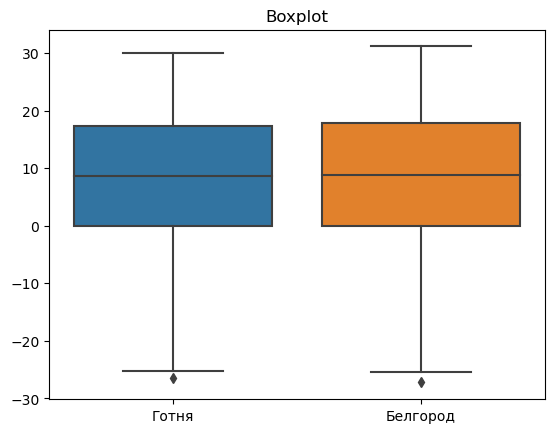

In [58]:
sns.boxplot(data=final_df);
plt.title("Boxplot");

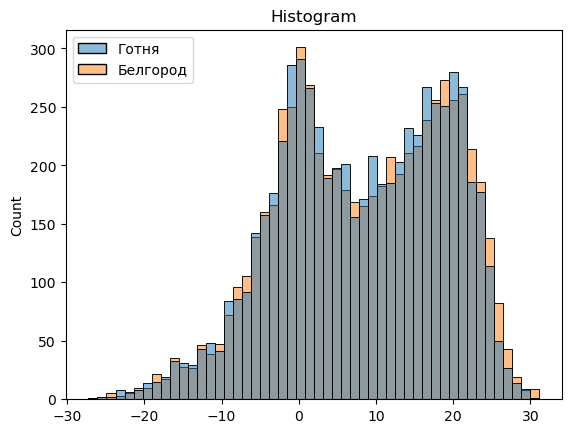

In [59]:
sns.histplot(data=final_df, bins=50);
plt.title("Histogram");

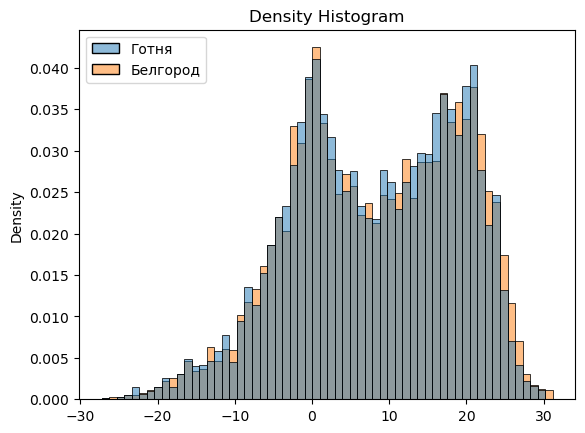

In [60]:
sns.histplot(data=final_df, bins=60, stat='density', common_norm=False);
plt.title("Density Histogram");

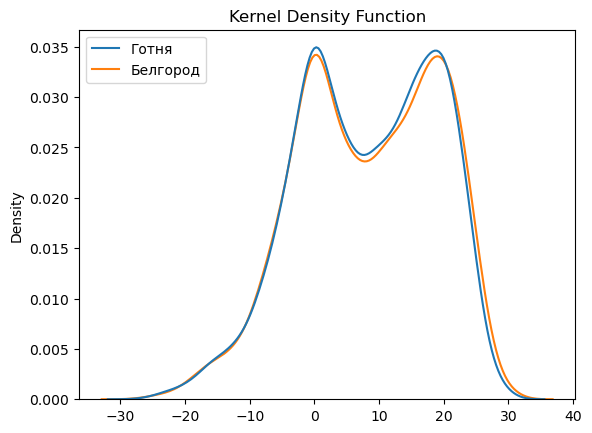

In [61]:
sns.kdeplot(data=final_df, common_norm=False);
plt.title("Kernel Density Function");

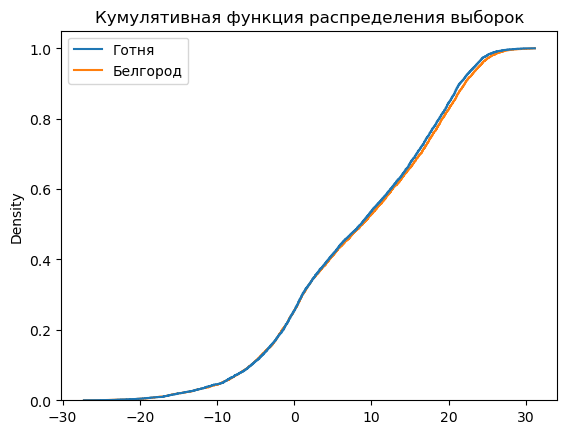

In [63]:
sns.histplot(data=final_df, bins=len(final_df), stat="density",
      element="step", fill=False, cumulative=True, common_norm=False);
plt.title("Кумулятивная функция распределения выборок");